In [1]:
import numpy as np
import corner
import emcee
import matplotlib.pyplot as plt

In [2]:
read = emcee.backends.HDFBackend("SDP_jam.h5")

In [3]:
#Get all chains of Emcee.
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.
chain = read.get_chain()   

In [4]:
#Get all log_probabilities
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

log_prob = read.get_log_prob()
best_log = np.where(log_prob == log_prob.max())
print(log_prob.max())

-312.77385620098835


In [5]:
#parameters of best walker
best_walker = chain[best_log][0]

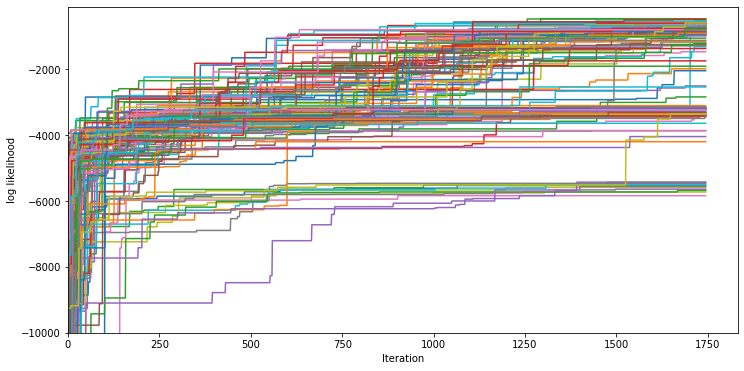

In [7]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-10000, -100)
    plt.xlim(0)
    plt.ylabel("log likelihood")
    plt.xlabel("Iteration")

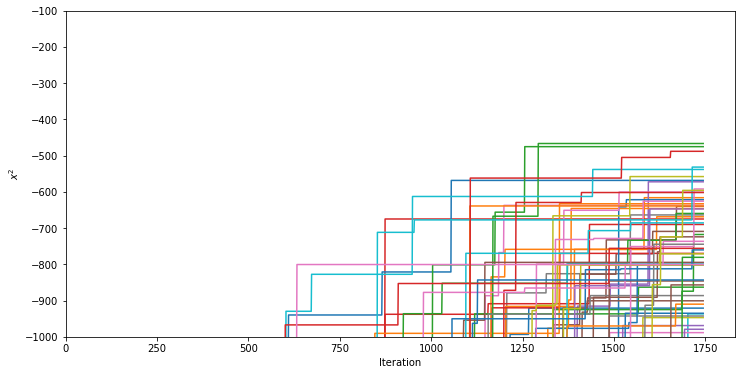

In [9]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-1000, -100)
    plt.xlim(0)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

In [10]:
#Get the number of accepted values
#E.g, accepted[10] = 2, means walker 10 was accepted 2 times

accepted = read.accepted
print("Number of accepted walkers:",np.count_nonzero(accepted))
accepted

Number of accepted walkers: 120


array([11., 19., 11., 16., 13., 21., 16., 20., 22., 12., 19., 17., 18.,
       19., 24., 17., 17., 17., 17., 11., 12., 17., 18., 10., 14., 21.,
       35.,  8., 14., 23., 18., 15., 23., 16., 25.,  7., 19., 16., 11.,
       12., 22., 15., 12., 11., 12., 22., 13., 15.,  6.,  8., 16., 15.,
       15., 18., 16., 26., 11., 23., 16., 20., 21., 10., 21.,  6., 13.,
       31., 16., 13., 11., 19.,  9., 16., 17., 24., 18., 20., 20., 10.,
       21., 12., 23., 16., 13., 13.,  8., 13., 15., 17., 23., 12., 16.,
       25., 14., 14., 16., 19., 21., 23., 21., 18., 18., 16., 20., 14.,
       14., 25., 10., 11., 24., 15., 14.,  9., 19., 20.,  8.,  7., 11.,
       30., 17., 16.])

In [ ]:
#Corner plots

labels = ["ML", "b1","b2","b3","b4","b5","b6","b7","b8", "inclination", "log_mbh", "log_rho_s", "qDM"]


tau = read.get_autocorr_time(tol=0)
print(tau)
samples = read.get_chain(flat=True)
log_prob_samples = read.get_log_prob(flat=True)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

[2211.65169264 1460.22114531 1415.01892719 1566.35485267 1609.42529523
 1479.5145569  1799.35987454 1315.56513222 1531.27444651 2341.63961633
 2303.55992523 1398.68779639 2315.69442203]
flat chain shape: (2524200, 13)
flat log prob shape: (2524200,)


4683 1170
flat chain shape: (1560, 13)
flat log prob shape: (1560,)


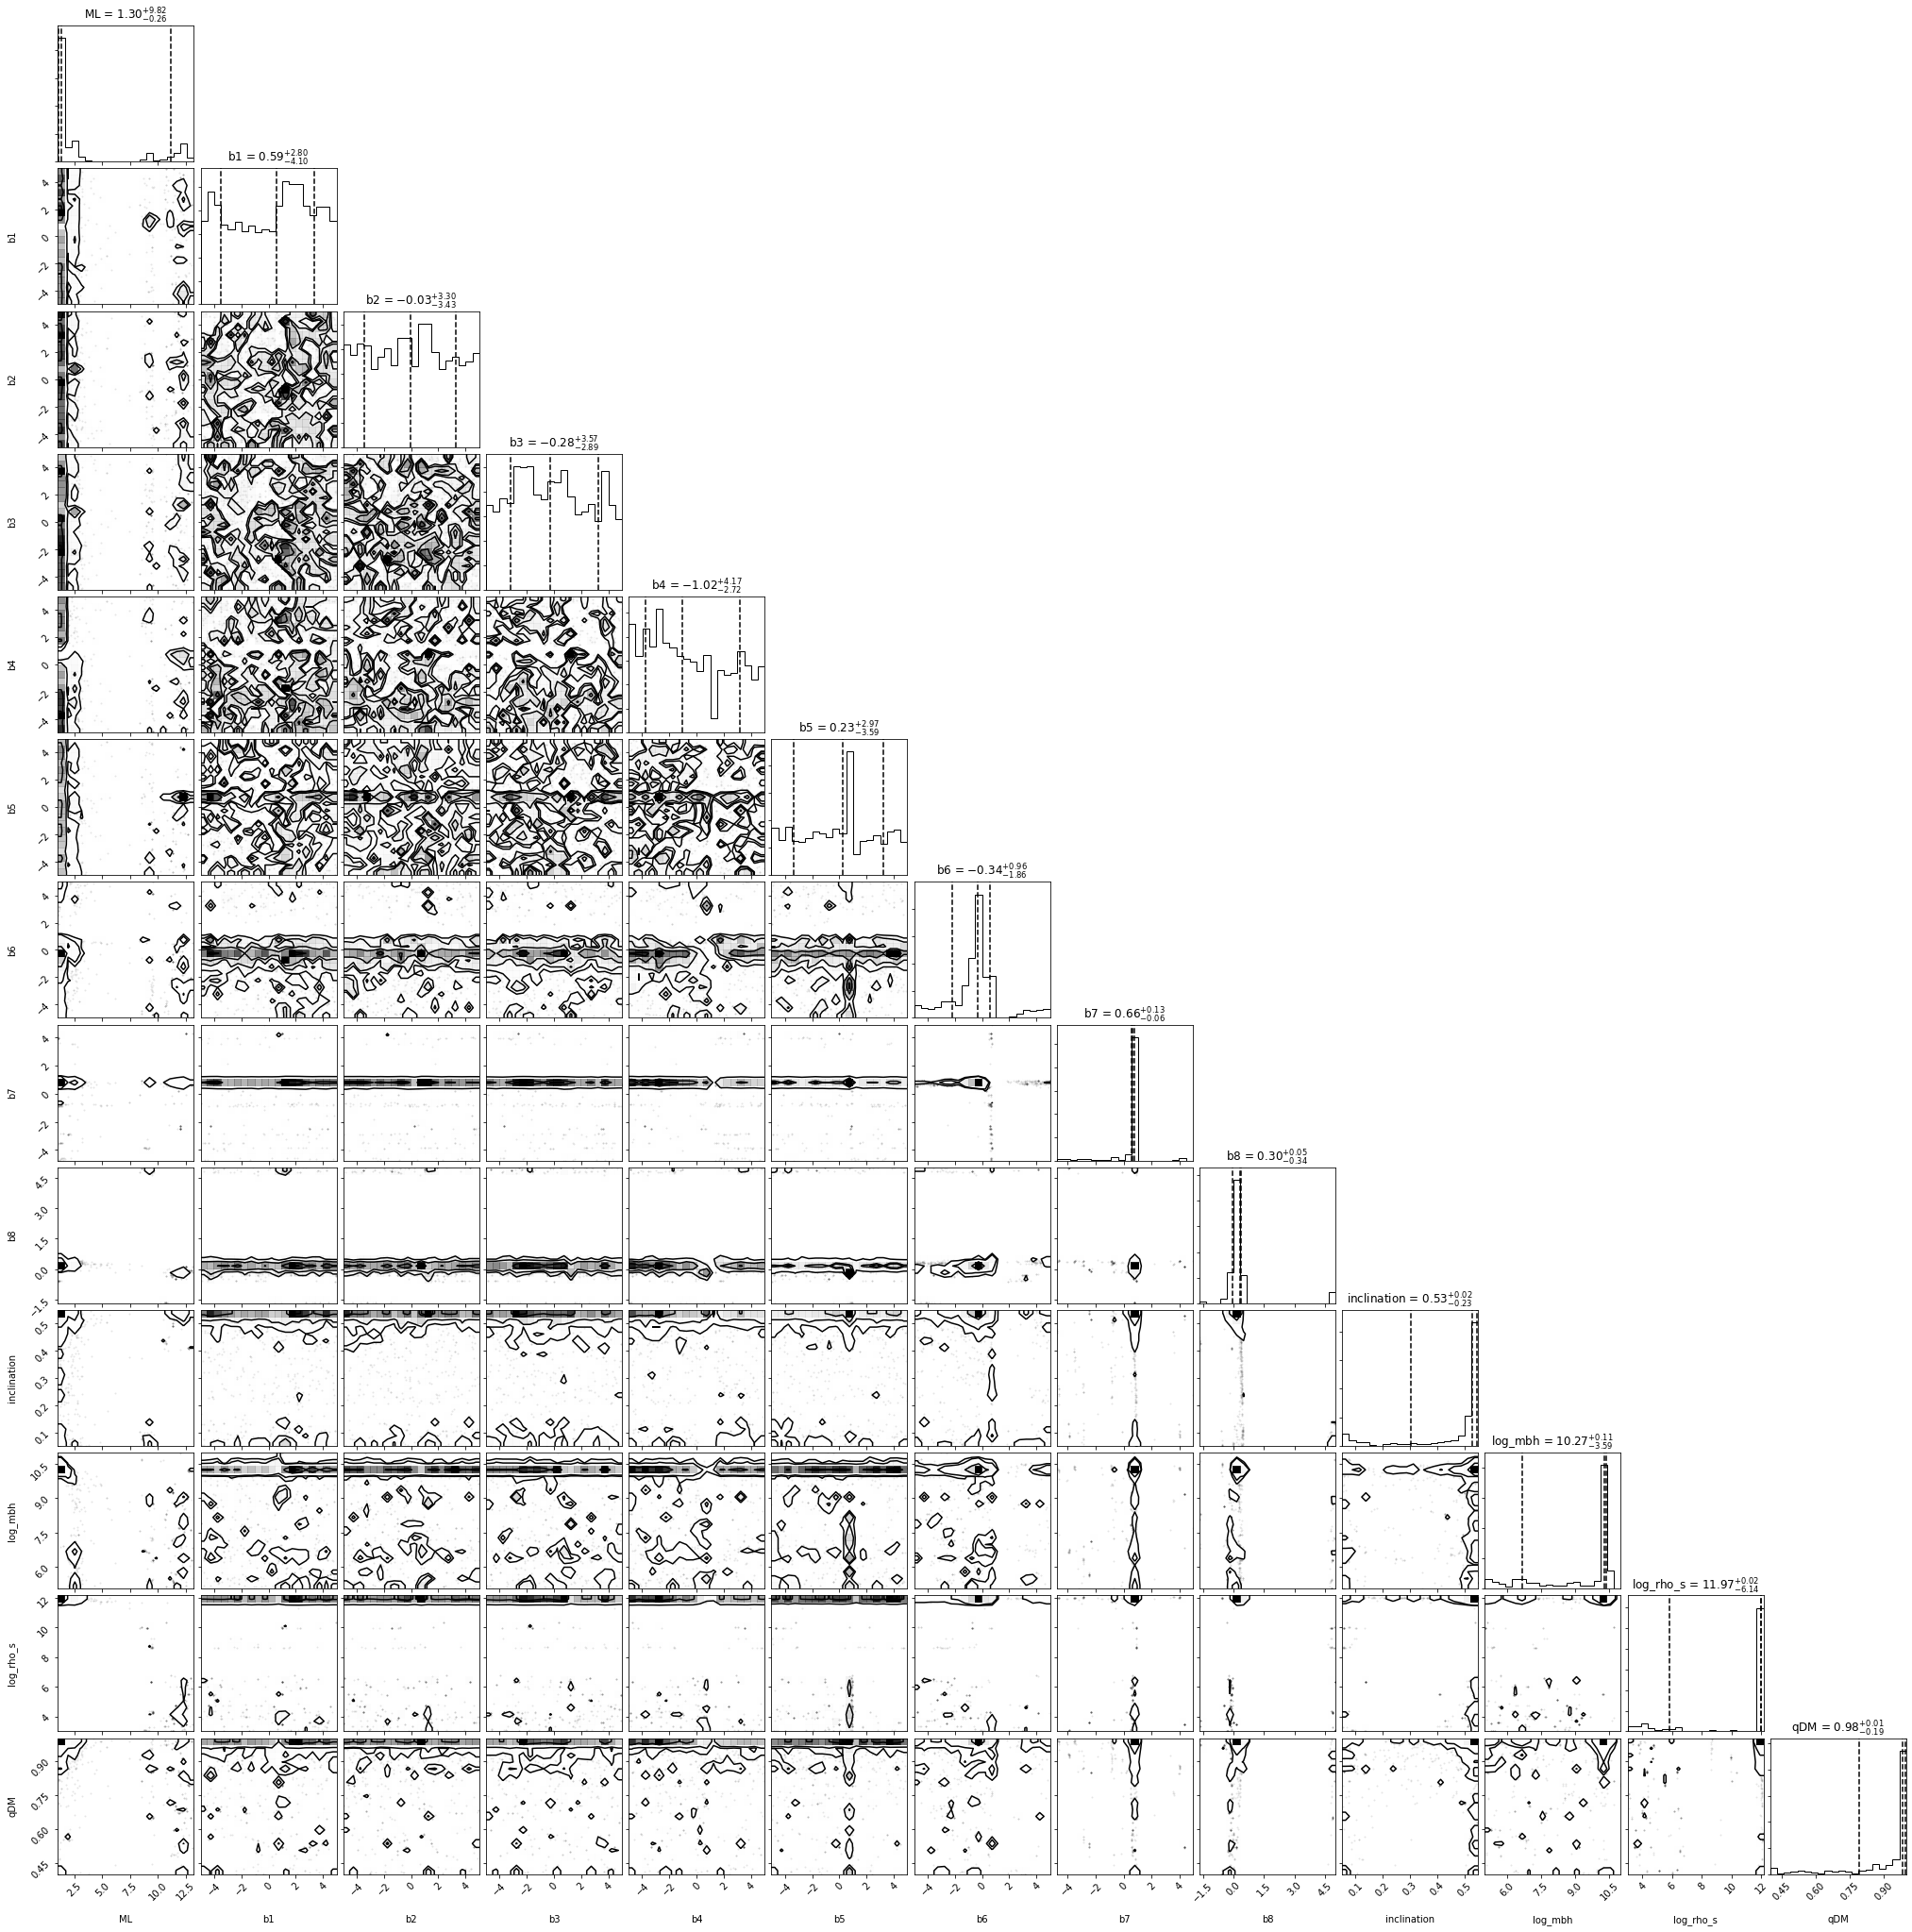

In [6]:
#Corner plots
tau = read.get_autocorr_time(tol=0)
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.max(tau))
print(burnin, thin)

labels = ["ML", "b1","b2","b3","b4","b5","b6","b7","b8", "inclination", "log_mbh", "log_rho_s", "qDM"]


samples = read.get_chain(discard=burnin, flat=True,thin=thin )
log_prob_samples = read.get_log_prob(discard=burnin,flat=True,thin=thin)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

In [7]:
from IPython.display import display, Math
best_fit = np.zeros(len(labels)-1)

for i in range(13):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    best_fit[i] = mcmc[1]
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [14]:
tau = read.get_autocorr_time()
tau

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 13 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 35;
tau: [209.05781183 180.26489553 167.73034232 166.58097671 164.00254981
 169.62953063 168.73882492 168.07497467 181.55021542 171.88147752
 174.19551615 198.28226992 180.08015407]

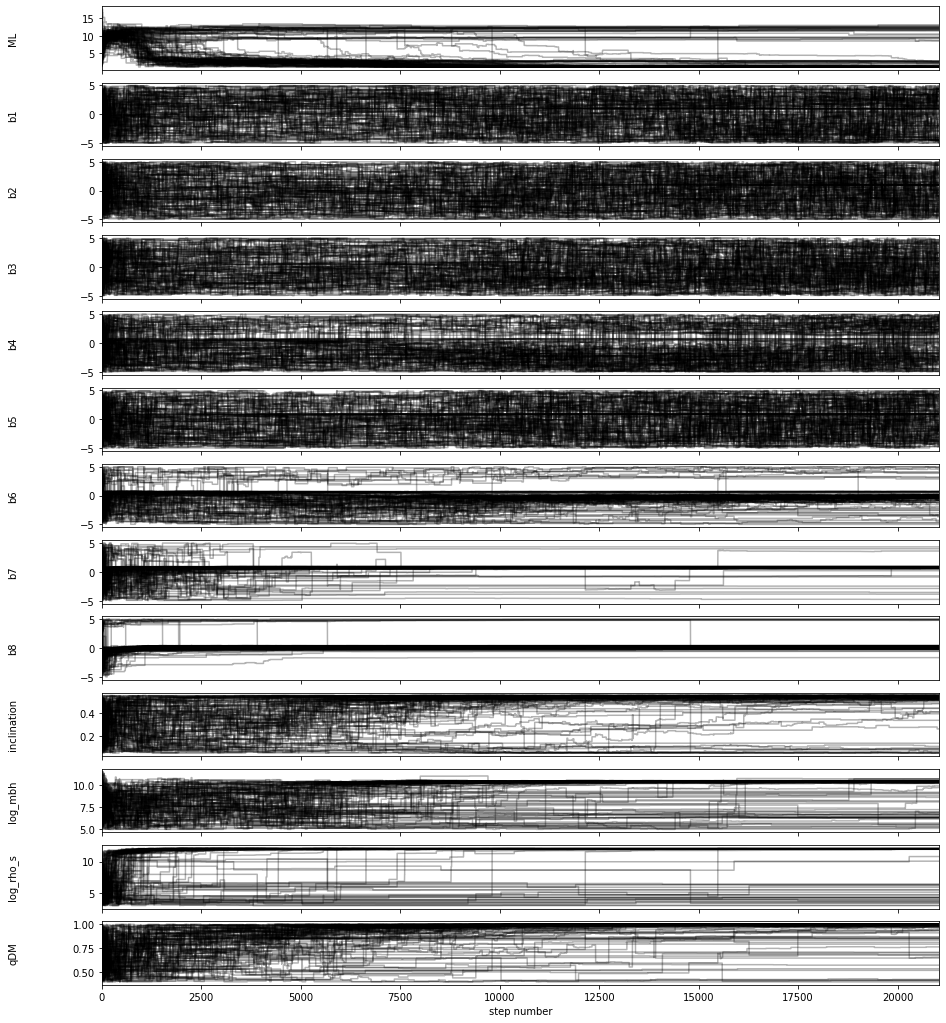

In [8]:
#Walke of each walker
fig, axes = plt.subplots(len(labels)-1, figsize=(15, 18), sharex=True)
samples = read.get_chain()

for i in range(len(labels)-1):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)


axes[-1].set_xlabel("step number");

In [15]:
it, accep_tot, time, accep_100 = np.loadtxt("Output_LogFile2.txt", unpack=True)

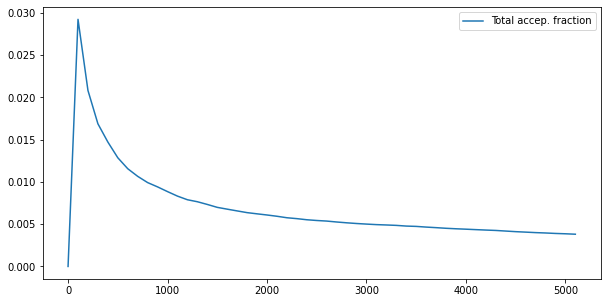

In [16]:
#Plot accep_tot vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_tot, label="Total accep. fraction")
plt.legend()

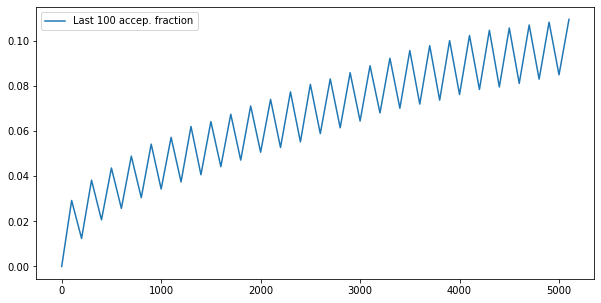

In [17]:
#Plot accep_100 vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_100, label="Last 100 accep. fraction")
#plt.ylim(0.15,)
plt.legend()

## Plot Model Best-Fit

In [8]:
#General packages
import numpy as np
from My_Jampy import JAM
import emcee
import matplotlib.pyplot as plt

#MPI
from schwimmbad import MPIPool

#Constants and usefull packages
from astropy.cosmology import Planck15 as cosmo
from astropy.constants import G, M_sun, c
import astropy.units as u



#Useful constants
metre2Mpc = (1*u.m).to(u.Mpc)/u.m           #Constant factor to convert metre to Mpc.
kg2Msun = (1*u.kg/M_sun)*u.solMass/u.kg     #Constant factor to convert kg to Msun

G_Mpc = G*(metre2Mpc)**3/kg2Msun            #Gravitational constant in Mpc³/(Msun s²)
c_Mpc = c*metre2Mpc                         #Speed of light in Mpc/s




In [2]:
def run(pos):
    ml, b1, b2, b3, b4, b5, b6, b7, b8, q_inc, log_mbh, log_rho, qdm = pos

    
       #Dataset path
    data_folder = "/home/carlos/Documents/GitHub/Master-Degree/SDP81/Dynamics/Emcee/Data/"

    #Reading MGE inputs
        #attention to units
    surf_lum, sigma_lum, qobs_lum = np.loadtxt(data_folder+"JAM_Input.txt", unpack=True)          #MGE decomposition
    surf_dm, sigma_dm , qobs_dm   = np.loadtxt(data_folder+"SDP81_pseudo-DM_halo.txt", unpack=True)    #DM component
    norm_psf, sigma_psf           = np.loadtxt(data_folder+"MUSE_Psf_model.txt", unpack=True)     #PSF
    ybin, xbin, vrms, erms        = np.loadtxt(data_folder+"pPXF_rot_data.txt", unpack=True)          #Vrms data

    muse_pixsize = 0.2                            #Muse pixel size [arcsec/px]
    print(sigma_lum)
    z_lens   = 0.299                                    #Lens redshifth
    z_source = 3.100                                    #Source redshift

    #Angular diameter distances
    D_l = cosmo.angular_diameter_distance(z_lens)                   #Lens              
    D_s = cosmo.angular_diameter_distance(z_source)                 #Source
    D_ls = cosmo.angular_diameter_distance_z1z2(z_lens, z_source)   #Lens to source
    
    qmin = np.min(qobs_lum)
    inc_model = np.degrees(np.arctan(np.sqrt((1 - qmin**2)/(qmin**2 - q_inc**2))))
    qdm_proj  = np.sqrt( (np.sin(np.radians(inc_model)) * qdm )**2  + np.cos( np.radians(inc_model))**2     )
    
    beta = np.array([b1,b2,b3,b4,b5,b6,b7,b8])
    qdm  = np.full_like(surf_dm, qdm_proj)

    
    Jam_model = JAM(ybin=ybin, xbin=xbin, inc=inc_model, distance=D_l.value, mbh=10**log_mbh, beta=beta, rms=vrms,
                        erms=erms,normpsf=norm_psf, sigmapsf=sigma_psf*muse_pixsize, pixsize=muse_pixsize)

        #Add Luminosity component
    Jam_model.luminosity_component(surf_lum=surf_lum, sigma_lum=sigma_lum, qobs_lum=qobs_lum, ml=ml)
        #Add DM component
    Jam_model.DM_component(surf_dm=10**(log_rho) * surf_dm, sigma_dm=sigma_dm, qobs_dm=qdm)

    rmsModel, ml_model, chi2, chi2T = Jam_model.run(plot=True, quiet=False)
    plt.tight_layout()
    print(-0.5 * chi2T)

## Best Model

[0.04569  0.130028 0.255286 0.588301 0.668833 1.224185 1.760555 3.255514]
jam_axi_rms elapsed time sec: 0.49
inc=80.0 beta_z=0.59 M/L=1 BH=1.84e+10 chi2/DOF=2.84
Total mass MGE: 1.992e+13
-330.5220325611107


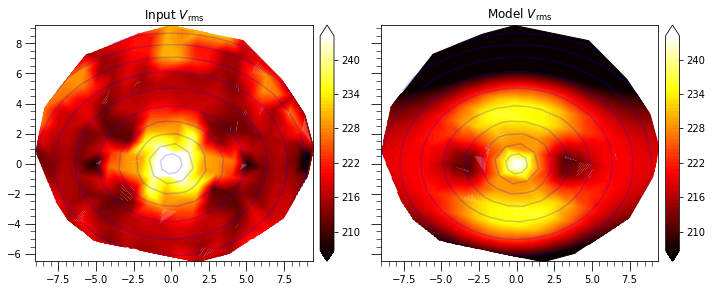

In [13]:
p0 = best_fit
plt.figure(figsize=(10,10))
run(p0)

## Best likelihood

In [11]:
p0 = best_walker
best_walker

array([ 1.02022345,  4.01356452,  3.22382639,  0.09798736,  4.66057527,
       -0.42569852, -0.12847056,  0.6392826 ,  0.29964523,  0.54704651,
       10.36471372, 11.9727315 ,  0.99691211])

[0.04569  0.130028 0.255286 0.588301 0.668833 1.224185 1.760555 3.255514]
jam_axi_rms elapsed time sec: 0.51
inc=86.1 beta_z=4.01 M/L=1 BH=2.32e+10 chi2/DOF=2.68
Total mass MGE: 2.028e+13
-312.77385620099153


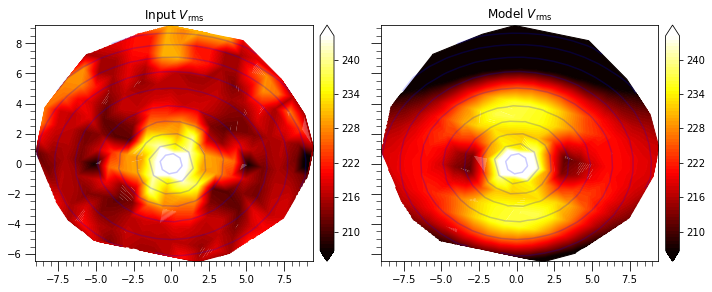

In [12]:
plt.figure(figsize=(10,10))
run(p0)

In [45]:
from astropy.cosmology import Planck15
import numpy as np
from astropy import units as u


d_A = cosmo.angular_diameter_distance(z=0.299)
print(d_A) 

theta = 24*u.arcsec
distance_Mpc = (theta * d_A).to(u.Mpc, u.dimensionless_angles()) # unit is Mpc only now

print(distance_Mpc) 


945.3773958098793 Mpc
0.10999965487208029 Mpc


In [46]:
theta = 3.25*u.arcsec
distance_Mpc = (theta * d_A).to(u.Mpc, u.dimensionless_angles()) # unit is Mpc only now

print(distance_Mpc) 

0.01489578659726087 Mpc
